In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT
import statistics
import math
import os
import time
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter
import matplotlib.ticker as mtick
#import datetime
import pandas as pd
import pyodbc
import numpy as np
from calendar import monthrange
import sys
from calendar import monthrange
from datetime import datetime, timedelta
import pandas as pd
from datetime import date
from itertools import compress
import xlsxwriter
#from os import walk
from openpyxl import load_workbook
#from datetime import datetime
from sutime import SUTime
from dateparser.search import search_dates
import openpyxl
import xlrd
import tkinter as tk
from tkinter import * 
import warnings
from prettytable import PrettyTable
import streamlit as st
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
from openpyxl.utils.dataframe import dataframe_to_rows
Reporting_month='2021/04'
census_financial_seperated=0
operator_folder=pd.DataFrame(columns=["Operator","Tempalte_file","Financial_file","Tempalte_file2","Financial_file2"])
#operator_folder.loc[len(operator_folder.index)]=["North America","TTM INCOME STATEMENT 04.2022_template.xlsx","TTM INCOME STATEMENT 04.2022.xlsx",None,None]
####operator_folder.loc[len(operator_folder.index)]=["Signature Healthcare","Signiture HealthCare 08.31.21 - 12 Month Detail Trend by ASBR_template.xlsx","03.31.23 - 12 Month Detail Trend by ASBR.xlsx",None,None]
#operator_folder.loc[len(operator_folder.index)]=["Covenant Care","2021-8-31 Financials_template.xlsx","2022-03-31 Financials.xlsx",None,None]
#operator_folder.loc[len(operator_folder.index)]=["Health Systems","Rollup June 2022-SABRA Properties-Totals_template.xlsx","Rollup June 2022-SABRA Properties-Totals.xlsx",None,None]
#operator_folder.loc[len(operator_folder.index)]=["Affinity","2022.05 - Rosecastle_template.xlsx","2022.05 - Rosecastle.xls",None,None]
#don't have mapping ---operator_folder.loc[len(operator_folder.index)]=["Avista","Avista_template_fincial.xlsx","06-2022 SCW P&L.xlsx","Avista_template_census.xlsx","6.30.2022 Avista Sun City West Financial Reports.xlsx"]
operator_folder.loc[len(operator_folder.index)]=["Andrew Residence","Andrew_template.xlsx","Andrew Residence 2Q2022 Reconciliation.xlsx",None,None]
#operator_folder.loc[len(operator_folder.index)]=["Consulate","Consulate_template.xlsx","Summary PL-Fort Pierce.xlsx",None,None]


In [3]:
last_row=len(operator_folder.index)-1
lastest_folder=operator_folder["Operator"][last_row]
lastest_template=operator_folder["Tempalte_file"][last_row]
lastest_financial=operator_folder["Financial_file"][last_row]
sheet_name_account_mapping="Account_Mapping"
sheet_name_entity_mapping="Property_Mapping"
template_path="C://Users//Sha Li//Desktop//Uploading project//"+lastest_folder+"//"
financial_path="C://Users//Sha Li//Desktop//Uploading project//"+lastest_folder+"//"
if operator_folder["Financial_file2"][last_row] is not None:
    lastest_template2=operator_folder["Tempalte_file2"][last_row]
    lastest_financial2=operator_folder["Financial_file2"][last_row]
    census_financial_seperated=1
  
    print(lastest_folder,lastest_template,lastest_template2,lastest_financial,lastest_financial2)
else: 
    print(lastest_folder,lastest_template,lastest_financial)
    
Uploading_date='4/01/2022'
Uploading_year=int(Uploading_date.split("/")[-1])
Uploading_month=int(Uploading_date.split("/")[0])
Uploading_Lastyear=Uploading_year-1

Measure_list=["Census","Revenues","Operating Expenses","Rent"] #"Management Fee"
Sabra_detail_accounts_list=['PD_MCR_MGD_CARE','PD_MEDICARE',
'PD_COMM_INS', 'PD_PRIVATE', 'PD_MEDICAID', 
'PD_VETERANS', 'PD_MCA_MGD_CARE', 'PD_OTHER',
 'REV_MCR_MGD_CARE', 'REV_MEDICARE',
 'REV_COMM_INS', 'REV_PRIVATE',
 'REV_MEDICAID', 'REV_VETERANS',
 'REV_MCA_MGD_CARE', 'REV_MEDICARE_B',
 'REV_OTHER', 'T_NURSING',
 'T_DIETARY_RAW', 'T_DIETARY_OTHER',
 'T_HOUSKEEPING', 'T_MAINTENANCE',
 'T_MARKETING', 'T_BAD_DEBT',
 'T_LEGAL', 'T_RE_TAX',
 'T_INSURANCE', 'T_GEN_ADMIN_OTHER',
 'T_ANCILLARY_THERAPY', 'T_ANCILLARY_PHARMACY',
 'T_ANCILLARY_OTHER', 'T_EXPENSES',
 'T_MGMT_FEE', 'T_OTHER_OP_EXO',
 'T_DEPR_AMORT', 'T_INT_INC_EXP',
 'T_RENT_EXP', 'T_SL_RENT_ADJ_EXP',
 'T_NURSING_LABOR', 'T_N_CONTRACT_LABOR',
 'T_OTHER_NN_LABOR', 'T_CASH_AND_EQUIV',
 'T_AR_GROSS', 'T_AR_VAL_RES',
 'T_INV', 'T_OTH_CUR_ASSETS',
 'T_TRADE_PAY', 'T_OTHER_CUR_LIAB',
 'T_LOC_OUT', 'T_OTHER_DEBT',
 'T_CAPEX', 'T_AR_WRT_OFF',
 'T_LOC_AVAIL', 'REV_ANCILLARY',
 'REV_CONT_ALLOW', 'T_NURSING_HOURS',
 'T_N_CONTRACT_HOURS', 'T_OTHER_HOURS',
 'G_REV_PRF', 'G_SEQ_SUSPENSION',
 'G_FMAP_FUND', 'G_REV_EXTR_COVID',
 'G_EXP_EXTR_COVID']

template_path="C://Users//Sha Li//Desktop//Uploading project//"+lastest_folder+"//"
financial_path="C://Users//Sha Li//Desktop//Uploading project//"+lastest_folder+"//"
template_filename=lastest_template
financial_filename=lastest_financial
template_path_filename=template_path+template_filename
finical_path_filename=financial_path+financial_filename
if finical_path_filename[-5:]=='.xlsx':
    finicial_sheet_list=openpyxl.load_workbook(finical_path_filename).sheetnames 
else:
    finicial_sheet_list = xlrd.open_workbook(finical_path_filename, on_demand=True).sheet_names()


month_dic={1:["January","Jan","01/","1/","-1","-01","/1","/01"],\
           2:["February","Feb","02/","2/","-2","-02","/2","/02"],\
           3:["March","Mar","03/","3/","-3","-03","/3","/03"],\
           4:["April","Apr","04/","4/","-4","-04","/4","/04"],\
           5:["May","05/","5/","-5","-05","/5","/05"],
           6:["June","Jun","06/","6/","-06","-6","/6","/06"],\
           7:["July","Jul","07/","7/","-7","-07","/7","/07"],\
           8:["August","Aug","08/","8/","-8","-08","/8","/08"],\
           9:["September","Sep","09/","9/","-09","-9","/9","/09"],\
           10:["October","Oct","10/","-10","/10",],\
           11:["November","Nov","11/","-11","/11"],\
           12:["December","Dec","12/","-12","/12"]}
year_dic={2021:["2021","21"],\
          2022:["2022","22"],\
          2023:["2023","23"],\
          2024:["2024","24"],\
          2025:["2025","25"],\
          2026:["2026","26"],\
          2019:["2019","19"],\
          2018:["2018","18"],\
          2020:["2020","20"]} 
dropdown_title_account='Map to Sabra Account'
dropdown_title_entity='Map sheet name to Property'
print(finicial_sheet_list)

Andrew Residence Andrew_template.xlsx Andrew Residence 2Q2022 Reconciliation.xlsx
['Reconciliation', 'BPC Data', 'Summary', 'Revenue Analysis', 'Variance Analysis', 'Andrew Income Statement', 'PropertyList']


In [4]:
def map_property_sheetname(finicial_sheet_list,template_path_filename): 
    excape_keywords=[]
    format_table=pd.read_excel(template_path_filename,sheet_name='Format')
    TENANT_ID=format_table["Tenant_ID"][0]

    DRIVER='ODBC Driver 17 for SQL Server'
    SERVER_NAME='13.88.16.109'
    DATABASE_NAME='Sabra'
    USER_NAME='sabrasli'
    PASSWORD='123'

    condition_query="(TENANT_ID='"+TENANT_ID+"' OR FORMER_RELATIONSHIP='"+TENANT_ID+"')"
    
    conn_string=f"""
    Driver={DRIVER};
    Server={SERVER_NAME};
    Database={DATABASE_NAME};
    UID={USER_NAME};
    PWD={PASSWORD};
    """
    conn=pyodbc.connect(conn_string)
    cursor = conn.cursor()
    
    Sabra_metrix="""

SELECT 			
		Mbrentity.id as Entity
        ,Mbrentity.EVDESCRIPTION as Property_Name
		,DATE_ACQUIRED
        ,DATE_SOLD_PAYOFF as Date_SOLD
        ,DATE_TRANSITIONED
        ,TENANT_ID

	FROM Sabra.dbo.Mbrentity

	LEFT JOIN sabra.dbo.mbrTenant  
		ON mbrTenant.ID = TENANT_ID
        
where INV_TYPE<>'Inv_Debt_other' and """+condition_query
    
    Entity_pull=pd.read_sql(Sabra_metrix, conn)
    Entity_pull['Sheet_Name']=''
    print(Entity_pull)
    
    for sheet_name in finicial_sheet_list:
        max_count=0
        for Property_Name_i in range(Entity_pull.shape[0]):
            count_i=0
            for key_word in sheet_name.split():
                if key_word in excape_keywords:
                    continue
                elif key_word in Entity_pull['Property_Name'][Property_Name_i]:
                    count_i+=1
            if count_i>max_count:
                max_count=count_i
                Entity_pull['Sheet_Name'][Property_Name_i]=sheet_name
    
    #save to format tempalte
    Entity_pull.to_excel(template_path+"map_sheetname.xlsx")
    
    
#map_property_sheetname(finicial_sheet_list,template_path_filename)

In [5]:
def get_row_no(dataset,row_header):
    return list(dataset.index).index(row_header)
def get_column_no(dataset,col_header):
    return list(dataset.columns).index(col_header)
def strip_lower_col(series_or_list):
    return(list(map(lambda x: str(x).strip().lower() if x==x else x,series_or_list)))
def strip_upper_col(series_or_list):
    return(list(map(lambda x: str(x).strip().upper() if x==x else x,series_or_list)))

def pull_metrix_from_Sql(TENANT_ID,start_date,end_date):
    DRIVER='ODBC Driver 17 for SQL Server'
    SERVER_NAME='13.88.16.109'
    DATABASE_NAME='Sabra'
    USER_NAME='sabrasli'
    PASSWORD='123'
    start_date_sql="01/"+start_date[4:6]+"/"+start_date[0:4]
    condition_query="(E.TENANT_ID='"+TENANT_ID+"' AND (E.DATE_SOLD_PAYOFF='' OR CONVERT(DATETIME,E.DATE_SOLD_PAYOFF)>= '"+\
        start_date_sql+"')) OR (E.FORMER_RELATIONSHIP='"+TENANT_ID+"' AND CONVERT(DATETIME,E.DATE_TRANSITIONED)>='"+\
        start_date_sql+"')"
    
    conn_string=f"""
    Driver={DRIVER};
    Server={SERVER_NAME};
    Database={DATABASE_NAME};
    UID={USER_NAME};
    PWD={PASSWORD};
    """
    conn=pyodbc.connect(conn_string)
    cursor = conn.cursor()
    
    Sabra_metrix="""
WITH Main as
(
--Revenue / Expense / Rent 
SELECT 			
		F.Entity
        ,F.Account
		,CASE 
			WHEN ACCOUNT LIKE '%REV_%' THEN 'Revenues'
			WHEN LEFT(ACCOUNT, 2) = 'T_' and ACCOUNT  not like '%RENT%' THEN 'Operating Expenses'
            WHEN  LEFT(ACCOUNT, 2) = 'PD' THEN 'Census'
            ELSE 'Rent' 
            END AS Parent_Account
 
		,TIMEID
		,CASE
				when ACCOUNT in ('T_BAD_DEBT') or LEFT(ACCOUNT, 2) not in ('T_','PD') THEN CAST(F.SIGNEDDATA AS float)*(-1)
                ELSE CAST(F.SIGNEDDATA AS float)
				END AS Amount

	FROM Sabra.dbo.tblFactFINANCE F

	LEFT JOIN sabra.dbo.mbrTenant  AS MO
		ON MO.ID = TENANT
		
	WHERE INVEST_TYPE = 'INV_EQUITY'
		AND Account IN (
'PD_MCR_Mgd_Care',
'PD_Medicare',
'PD_Comm_Ins',
'PD_Private',
'PD_Medicaid',
'PD_Veterans',
'PD_MCA_Mgd_Care',
'PD_Other',
'REV_MCR_Mgd_Care',
'REV_Medicare',
'REV_Comm_Ins',
'REV_Private',
'REV_Medicaid',
'REV_Veterans',
'REV_MCA_Mgd_Care',
'Rev_Medicare_B',
'REV_Other',
'T_Nursing',
'T_Dietary_Raw',
'T_Dietary_Other',
'T_Houskeeping',
'T_Maintenance',
'T_Marketing',
'T_BAD_DEBT',
'T_Legal',
'T_RE_Tax',
'T_Insurance',
'T_gen_Admin_other',
'T_Ancillary_Therapy',
'T_Ancillary_Pharmacy',
'T_Ancillary_Other',
'T_EXPENSES',
'T_MGMT_Fee',
'T_CASH_AND_EQUIV',
'T_AR_GROSS',
'T_AR_VAL_RES',
'T_INV',
'T_OTH_CUR_ASSETS',
'T_TRADE_PAY',
'T_OTHER_CUR_LIAB',
'T_LOC_OUT',
'T_OTHER_DEBT',
'T_CAPEX',
'T_AR_WRT_OFF',
'T_LOC_AVAIL',
'REV_Ancillary',
'REV_Cont_Allow',
'T_Nursing_Hours',
'T_N_Contract_Hours',
'T_Other_Hours',
'G_REV_PRF',
'G_SEQ_SUSPENSION',
'G_FMAP_FUND',
'G_REV_EXTR_COVID',
'G_EXP_EXTR_COVID'
        )

        
        
UNION ALL
SELECT 			
		F.Entity
        ,F.Account
		,CASE 
			WHEN LEFT(ACCOUNT, 2) = 'T_' and ACCOUNT  not like '%_Labor' 
                THEN 'Tenant_Non-Operating_Expenses'
            ELSE 'Labor_Expenses' 
            END AS Parent_Account
 
		,TIMEID
        ,Case When ACCOUNT in ('T_OTHER_OP_EXO','T_INT_INC_EXP') Then CAST(F.SIGNEDDATA AS float)*(-1) 
        Else CAST(F.SIGNEDDATA AS float)
        ENd AS Amount

	FROM Sabra.dbo.tblFactFINANCE F

	LEFT JOIN sabra.dbo.mbrTenant  AS MO
		ON MO.ID = TENANT
		
	WHERE INVEST_TYPE = 'INV_EQUITY'
		AND Account IN ('T_OTHER_OP_EXO','T_DEPR_AMORT','T_INT_INC_EXP','T_RENT_EXP',
        'T_SL_RENT_ADJ_EXP','T_Nursing_Labor','T_N_Contract_Labor','T_Other_NN_Labor')

)

select F.ENTITY,F.TIMEID,F.AMOUNT,F.ACCOUNT,F.Parent_Account,E.EVDESCRIPTION as Property_Name
from Main as F
right join MBRENTITY as E
ON F.entity=E.ID
where E.INV_TYPE<>'Inv_Debt_other' and """+condition_query+"""

"""
    BPC_pull=pd.read_sql(Sabra_metrix, conn)
    BPC_pull=pd.pivot_table(BPC_pull, index=["ENTITY","ACCOUNT","Property_Name"], columns=["TIMEID"])
    BPC_pull.columns=list(map(lambda x:x[1],BPC_pull.columns))
    BPC_pull[list(filter(lambda x:x>=start_date and x<=end_date,BPC_pull.columns))]
    BPC_pull=BPC_pull.reset_index(['Property_Name'])
    return BPC_pull

In [6]:
# get account mapping from template
def Read_Account_Mapping(template_path_filename):
    #read mapping tempalte
    format=pd.read_excel(template_path_filename,sheet_name=sheet_name_account_mapping,header=0)
        #convert tenant_account to lower case
    format["Tenant_account"]=strip_lower_col(format["Tenant_account"])
    format["Sabra_second_account"]=strip_upper_col(format["Sabra_second_account"])
    format["Sabra_account"]=strip_upper_col(format["Sabra_account"])
        # filter out nan in col Sabra_account
    mapping=format.loc[list(map(lambda x:x==x,format["Sabra_account"])),\
                                     ["Sabra_account","Tenant_account","Sabra_second_account"]]
    mapping=mapping.loc[list(map(lambda x:x==x,mapping["Tenant_account"])),\
                                     ["Sabra_account","Tenant_account","Sabra_second_account"]]
    mapping=mapping.drop_duplicates()
    mapping=mapping.reset_index(drop=True)
    return mapping

In [7]:
def Map_New_Account(financial,mapping,sheet_name):
    
    new_accounts=[x if x not in list(mapping["Tenant_account"]) and not x!=x else "" \
             for x in financial.index]
    new_accounts=list(filter(lambda x:x!="",new_accounts))
    
    #there is no new account
    if len(new_accounts)==0:
        return mapping

    maplist=[]
    fenetre= tk.Tk()
    fenetre.geometry("800x500")
    text1 = Label(fenetre, text="Found new accounts in worksheet: "+sheet_name,fg="black", font =("Montserrat" ,22) ,height ="1",)
    text1.pack()
 
    fenetre.title("Found new accounts in worksheet: "+sheet_name)

    boutonlaunch=Button(fenetre,text="Submit",width=15,height=1,bg="white",bd=5,command=fenetre.destroy)
    boutonlaunch.pack(side=RIGHT)  

    for account_i in range(len(new_accounts)):
        cadre1=Frame(fenetre)
        cadre1.pack(side=TOP,anchor=NW)
        cadre=Frame(cadre1)
        cadre.pack()

        new_account_label=Label(cadre, width=35,text=new_accounts[account_i])
        new_account_label.pack(side=LEFT)

        value_inside = StringVar()
        value_inside.set(dropdown_title_account)
        mapbox = OptionMenu(cadre, value_inside, *["No need to map"]+\
                            list(mapping["Sabra_account"].unique()))
        mapbox.config(width=30)
        mapbox.config(bg="#1544CB", fg="WHITE")
        mapbox.pack(side=LEFT)
        maplist.append(value_inside) 
   
    fenetre.mainloop()

    # update mapping list:insert new accounts in to mapping
    len_mapping=len(mapping.index)
    j=0
    for i in range(len(maplist)):
        if maplist[i].get()!=dropdown_title_account: #and maplist[i].get()!="No need to map":
            mapping.loc[len_mapping+j,"Sabra_account"]=maplist[i].get()
            mapping.loc[len_mapping+j,"Tenant_account"]=new_accounts[i]
            j+=1
        elif maplist[i].get()==dropdown_title_account:
            mapping.loc[len_mapping+j,"Sabra_account"]="No need to map"
            mapping.loc[len_mapping+j,"Tenant_account"]=new_accounts[i]
            j+=1
            
        
            
    # update mapping workbook        
    
    workbook = load_workbook(template_path_filename)
    workbook.remove(workbook[sheet_name_account_mapping])
    new_worksheet = workbook.create_sheet(sheet_name_account_mapping)
    for r in dataframe_to_rows(mapping, index=False, header=True):
        new_worksheet.append(r)
    workbook.save(template_path_filename)
    
    return mapping

In [8]:
def Map_New_Entity(BPC_pull,entity_mapping):
    Entity_in_BPC=set(BPC_pull.index.get_level_values('ENTITY'))
    Entity_in_format=list(entity_mapping.loc[entity_mapping["Sheet_Name"]==entity_mapping["Sheet_Name"],'Entity'])
    Missing_Entity=list(filter(lambda x:x not in Entity_in_format,Entity_in_BPC))
    if len(Missing_Entity)==0:
        return entity_mapping
    elif len(Missing_Entity)>0:
        print("We couldn't found P&L of below properties, please type the corresponding sheet name of these properties in the right box")
    

    maplist=[]
    fenetre= tk.Tk()
    fenetre.geometry("800x500")
    text1 = Label(fenetre, text="Please map below properties with corresponding worksheet:",fg="black", font =("Montserrat" ,22) ,height ="1",)
    text1.pack()
 
    fenetre.title("Map properties to corresponding worksheet name ")

    boutonlaunch=Button(fenetre,text="Submit",width=15,height=1,bg="white",bd=5,command=fenetre.destroy)
    boutonlaunch.pack(side=RIGHT)  

    for entity_i in range(len(Missing_Entity)):
        cadre1=Frame(fenetre)
        cadre1.pack(side=TOP,anchor=NW)
        cadre=Frame(cadre1)
        cadre.pack()
        new_account_label=Label(cadre, width=35,text=BPC_pull.loc[Missing_Entity[entity_i]]["Property_Name"][0])
        new_account_label.pack(side=LEFT)

        value_inside = StringVar()
        value_inside.set(dropdown_title_entity)
        mapbox = OptionMenu(cadre, value_inside, *finicial_sheet_list)
        mapbox.config(width=30)
        mapbox.config(bg="#1544CB", fg="WHITE")
        mapbox.pack(side=LEFT)
        maplist.append(value_inside) 
   
    fenetre.mainloop()

    # update mapping list:insert new accounts in to mapping
    len_entity_mapping=entity_mapping.shape[0]
    j=0
    for i in range(len(maplist)):
        if maplist[i].get()!=dropdown_title_entity: #and maplist[i].get()!="No need to map":
            entity_mapping.loc[len_entity_mapping+j,"Sheet_Name"]=maplist[i].get()
            entity_mapping.loc[len_entity_mapping+j,"Entity"]=Missing_Entity[i]
            j+=1
        elif maplist[i].get()==dropdown_title_entity:
            entity_mapping.loc[len_entity_mapping+j,"Sheet_Name"]=''
            entity_mapping.loc[len_entity_mapping+j,"Entity"]=Missing_Entity[i]
        
    if j>0:          
    # update entity_mapping workbook  
        workbook = load_workbook(template_path_filename)
        workbook.remove(workbook[sheet_name_entity_mapping])
        new_worksheet = workbook.create_sheet(sheet_name_entity_mapping)
        for r in dataframe_to_rows(entity_mapping, index=False, header=True):
            new_worksheet.append(r)
        workbook.save(template_path_filename)    
    return entity_mapping

In [9]:
#search the column of tenant account in Trial balance
# transfer all the account name(revenue, expense, occ) into standard form : lower case
# return col number of tenant accounts
def Identify_Tenant_Account_Col(financial,mapping,sheet_name):
    #tenant_account_col_no=mapping[1]
    for tenantAccount_col_no in range(0,financial.shape[1]):
        #trim and lower case column
        account_column=strip_lower_col(financial.iloc[:,tenantAccount_col_no])
        
        #find out how many tenant accounts match with that in mapping template
        match=[x in  list(account_column) for x in mapping["Tenant_account"]]

        #If 50% accounts of financial match with that of mapping template, identify this col as tenant account.
        if len(match)>0 and sum(x for x in match)/len(match)>0.1:
            
            return tenantAccount_col_no  
        else:
            # wrong account column,continue search accounts col
            continue
    
    # didn't find accounts col
    print("Can't find account column in sheet—— '"+sheet_name+"'")
        

In [10]:
def Aggregated_Metrix(financial,mapping,entity):
    # convert index to 0,1,2,3....to avoid duplication, original index:'Tenant_account'
    mapping=mapping.loc[list(map(lambda x:x!='NO NEED TO MAP',mapping["Sabra_account"])),\
                        ["Sabra_account","Tenant_account","Sabra_second_account"]]
    financial=financial.reset_index(drop=False)
    second_account_mapping=mapping[mapping["Sabra_second_account"]==mapping["Sabra_second_account"]][["Sabra_second_account","Tenant_account"]].\
                            rename(columns={"Sabra_second_account": "Sabra_account"})
    
    financial=pd.concat([financial.merge(second_account_mapping,on='Tenant_account',how='right'),\
                        financial.merge(mapping[["Sabra_account","Tenant_account"]],on='Tenant_account',how='right')])
    
    financial=financial.set_index('Sabra_account',drop=True)
    
    financial.index.name="Sabra_account"
    financial_with_detail_PLaccounts=financial
    # aggregate by sabra_account
    financial = financial.drop('Tenant_account', axis=1)
    financial=financial.groupby(by="Sabra_account").sum()
    
    financial.index=[[entity]*len(financial.index),list(financial.index)]
    financial_with_detail_PLaccounts.index=[[entity]*len(financial_with_detail_PLaccounts.index),financial_with_detail_PLaccounts.index]
    return financial,financial_with_detail_PLaccounts


In [11]:
# add year to month_header: identify current year/last year giving a list of month
def Add_year_to_header(month_list):
    available_month=list(filter(lambda x:x!=0,month_list))
    
    today=date.today()
    current_year= today.year
    last_year=today.year-1

    if len(available_month)==1:
        
        if datetime.strptime(available_month[0]+"/01/"+current_year,'%m/%d/%Y').date()<today:
            year=current_year
        else:
            year=today.year-1
        return year
     
    year_change=0     
    # month decending  #and available_month[0]<today.month
    if (available_month[0]>available_month[1] and available_month[0]!=12) or \
    (available_month[0]==1 and available_month[1]==12) : 
        date_of_assumption=datetime.strptime(str(available_month[0])+"/01/"+str(current_year),'%m/%d/%Y').date()
        if date_of_assumption<today and date_of_assumption.month<today.month:
            report_year_start=current_year
        elif date_of_assumption>=today:
            report_year_start=last_year
        for i in range(len(available_month)):
            available_month[i]=report_year_start-year_change
            if i<len(available_month)-1 and available_month[i+1]==12:
                year_change+=1
            
    # month ascending   
    elif (available_month[0]<available_month[1] and available_month[0]!=12) \
        or (available_month[0]==12 and available_month[1]==1): #and int(available_month[-1])<today.month
        date_of_assumption=datetime.strptime(str(available_month[-1])+"/01/"+str(current_year),'%m/%d/%Y').date()    
        if date_of_assumption<today:
            report_year_start=current_year
        elif date_of_assumption>=today:
            report_year_start=last_year
        for i in range(-1,len(available_month)*(-1)-1,-1):
   
            available_month[i]=report_year_start-year_change
            if i>len(available_month)*(-1) and available_month[i-1]==12:
                #print("year_change",year_change)
                year_change+=1
    
    else:
        return False
    
    
    j=0

    for i in range(len(month_list)):
        if month_list[i]!=0:
            month_list[i]=available_month[j]
            j+=1

    return month_list  

In [12]:
def Get_Year(single_string):
    if single_string!=single_string or single_string==None or type(single_string)==float:
        return 0,""
    else:
        for Year in year_dic.keys():
            for Year_keyword in year_dic[Year]:
                if Year_keyword in single_string:
                    return Year,Year_keyword
        return 0,""


def Get_Month_Year(single_string):
    if single_string!=single_string or single_string==None or type(single_string)==float:
        return 0,0
    if type(single_string)==datetime:
        return int(single_string.month),int(single_string.year)
    
    single_string=str(single_string)
    Year,Year_keyword=Get_Year(single_string)
    
    # remove year from string
    single_string=single_string.replace(Year_keyword,"")
 
    for Month in month_dic.keys() :#[01,02,03...12]
        for  Month_keyword in month_dic[Month]: #["Jan","January","01","-1","/1",'1/']
            if Month_keyword.lower() in single_string.lower():
                remaining=single_string.lower().replace(Month_keyword.lower(),"").replace("/","")\
                                .replace("-","").replace(" ","").replace("_","")

                #if there are more than 3 other char in the string, this string maybe not the date 
                if len(remaining)>=3:
                    return 0,0
                else:   
                    return Month,Year
            # only year without month, length>3
            else:
                continue
    return 0,Year

In [13]:
def Month_continuity_check(month_list):
    inv=[]
    month_list=list(filter(lambda x:x!=0,month_list))
    if len(month_list)==0:
        return False
    else:
        inv=[int(month_list[month_i+1])-int(month_list[month_i]) for month_i in range(len(month_list)-1) ]
        if  len(set(inv))<=2 and all([x in [1,-1,11,-11] for x in set(inv)]):
            #continues month, it is month row
            return True
        else:
            return False
def Year_continuity_check(year_list):
    inv=[]
    year_list=list(filter(lambda x:x!=0,year_list))
    if len(year_list)==0:
        return False
    else:
        inv=[int(year_list[year_i+1])-int(year_list[year_i]) for year_i in range(len(year_list)-1) ]
        if len(set(inv))<=2 and all([x in [1,0,-1] for x in set(inv)]):
            #continues year, it is year row
            return True        
        else:
            return False
        

# find the Month/year row and return row number
def Identify_Month_Row(financial,tenantAccount_col_no,sheet_name):
    row_size=min(20,financial.shape[0])
    month_table=pd.DataFrame(0,index=range(row_size), columns=range(financial.shape[1]))
    year_table=pd.DataFrame(0,index=range(row_size), columns=range(financial.shape[1]))
    
    #year_table=pd.DataFrame(0,index=range(row_size), columns=range(financial.shape[1]))

    for row_i in range(min(20,financial.shape[0])):
        for col_i in range(financial.shape[1]):
            if type(financial.iloc[row_i,col_i])==int or type(financial.iloc[row_i,col_i])==float:
                continue
            month_table.iloc[row_i,col_i],year_table.iloc[row_i,col_i]=Get_Month_Year(financial.iloc[row_i,col_i])
    year_count=[]
    month_count=[]
    max_len=0
    for row_i in range(row_size):
        valid_month=list(filter(lambda x:x!=0,month_table.iloc[row_i,]))
        valid_year=list(filter(lambda x:x!=0,year_table.iloc[row_i,]))
        month_count.append(len(valid_month))
        year_count.append(len(valid_year))

    # didn't find any month in all the rows
    if all(map(lambda x:x==0,month_count)):
        print("Can't identify month/year columns in sheet——'"+sheet_name+"'")   
        return [0],0
    month_sort_index = np.argsort(np.array(month_count))
    year_sort_index = np.argsort(np.array(year_count))
    for month_index_i in range(-1,-4,-1): # only check three of the most possible rows
        
        #month_sort_index[-1] is the index number of month_count in which has max month count
        #month_sort_index[i] is also the index/row number of finicial
        
        #print(month_count[month_sort_index[month_index_i]])
        if month_count[month_sort_index[month_index_i]]>1:
            #check validation of month
            #print(Month_continuity_check(month_table.iloc[month_sort_index[month_index_i],]))
            if Month_continuity_check(month_table.iloc[month_sort_index[month_index_i],]):
                for year_index_i in range(-1,-4,-1):
                    # check validation of year
                    #print("check year",Year_continuity_check(year_table.iloc[year_sort_index[year_index_i],]))
                    #print(year_count[year_sort_index[year_index_i]])
                    #print(month_count[month_sort_index[month_index_i]])
                    if Year_continuity_check(year_table.iloc[year_sort_index[year_index_i],]) \
                        and year_count[year_sort_index[year_index_i]]==month_count[month_sort_index[month_index_i]]:
                        #print("success")
                        financial_date_header=year_table.iloc[year_sort_index[year_index_i],].apply(lambda x:str(int(x)))+\
                        month_table.iloc[month_sort_index[month_index_i],].apply(lambda x:"" if x==0 else "0"+str(int(x)) if x<10 else str(int(x)))
                        return financial_date_header,month_sort_index[month_index_i]
                    
                    # all the year rows are not valid, add year to month
                    else:
                        continue
                    # all the year rows are not valid, add year to month
                year_table.iloc[year_sort_index[year_index_i],]=Add_year_to_header(list(month_table.iloc[month_sort_index[month_index_i],]))
                financial_date_header=year_table.iloc[year_sort_index[year_index_i],].apply(lambda x:str(int(x)))+\
                month_table.iloc[month_sort_index[month_index_i],].apply(lambda x:"" if x==0 else "0"+str(int(x)) if x<10 else str(int(x)))
                
                print("Missing year info in date header in sheet '"+sheet_name+"'. Fill year as below: ")
                header_print = PrettyTable()
                header_print.add_row(list(filter(lambda x:str(x)!='0',financial_date_header)))
                header_print.align = "r"
                print(header_print.get_string(header=False))
                return financial_date_header,month_sort_index[month_index_i]
                        
            # month is not continuous, check next one
            else:
                continue
                
        # only one month in header:month and year must exist for one month header
        elif month_count[month_sort_index[month_index_i]]==1:
            # month and year must match 
            print("There is only one month in sheet——'"+sheet_name+"'")
            col_month=0
            #find the col number of month
            while(month_table.iloc[month_sort_index[month_index_i],col_month]==0):
                col_month+=1
                #print(month_table.iloc[month_sort_index[month_index_i],col_month])
                #if month_table.iloc[month_sort_index[index_i],col_month]!=1:
            #if column of month is smaller than column of account, or there is no year in month, continue 
            if col_month<tenantAccount_col_no or \
                year_table.iloc[month_sort_index[month_index_i],col_month]==0:
                print("There is no year in date row in sheet——'"+sheet_name+"'")
                continue
           
            count_num=0
            count_str=0
            for row_month in range(month_sort_index[month_index_i],financial.shape[0]):
                if financial.iloc[row_month,col_month]==None or \
                    pd.isna(financial.iloc[row_month,col_month]) or \
                    financial.iloc[row_month,col_month]=="":
                    continue
                        
               
                elif type(financial.iloc[row_month,col_month])==float or \
                    type(financial.iloc[row_month,col_month])==int:
                    count_num+=1
                else:
                    count_str+=1
                # count_num/str is count of numous/character data under month
                # for a real month column, numous data is supposed to be more than character data
            if count_str>0 and count_num/count_str<0.8:
                continue
                
            else:
                financial_date_header=year_table.iloc[month_sort_index[month_index_i],].apply(lambda x:str(int(x)))+\
                        month_table.iloc[month_sort_index[month_index_i],].apply(lambda x:"" if x==0 else "0"+str(int(x)) if x<10 else str(int(x)))
                        
                return financial_date_header,month_sort_index[month_index_i]
    print("Can't identify date row in P&L for sheet: '"+sheet_name+"'")
    return [0],0

In [14]:
def compare_financial_with_BPC(BPC_pull,Total_tenant_financial,entity_mapping,mapping):
    account=0
    print("Compare P&L to BPC")
    diff_BPC_financial=pd.DataFrame(columns=["TIME","Entity","Property_Name","Sabra_Account","Sheet_name","BPC","Operator Finance","Diff"])
    for entity in entity_mapping["Entity"]:
        for matrix in Sabra_detail_accounts_list: #set(map(lambda x :x[1],Total_tenant_financial.index)):
            for timeid in Total_tenant_financial.columns:
                try:
                    BPC_value=int(BPC_pull.loc[entity,matrix][timeid+'00'])
                except:
                    BPC_value=0
                try:
                    Operator_value=int(Total_tenant_financial.loc[entity,matrix][timeid])
                except:
                    Operator_value=0
                
                if BPC_value==0 and Operator_value==0:
                    continue
                
               
                if abs(BPC_value-Operator_value)>3:
                    Property_Name=entity_mapping.loc[entity_mapping["Entity"]==entity,"Property_Name"].item()
                    Sheet_name=entity_mapping.loc[entity_mapping["Entity"]==entity,'Sheet_Name'].item()
                    #print("BPC_value",BPC_value,"Operator_value",Operator_value)
                    diff_record=pd.DataFrame({"TIME":timeid,"Entity":entity,"Property_Name":Property_Name,"Sabra_Account":matrix,\
                    "Sheet_name":Sheet_name,"BPC":BPC_value,"Operator Finance":Operator_value,"Diff":BPC_value-Operator_value},index=[0])
                    diff_BPC_financial=pd.concat([diff_BPC_financial,diff_record],ignore_index=True)
    dismatch=diff_BPC_financial.shape[0]
    if dismatch>0:
        total_data=Total_tenant_financial.shape[0]*Total_tenant_financial.shape[1]
        diff_plot_account=diff_BPC_financial.groupby("Sabra_Account").count()/total_data*4
        diff_plot_account.reset_index(drop=False).plot.bar(x="Sabra_Account", y='Entity', rot=0,figsize=(diff_plot_account.shape[0]+2,5))
        diff_plot_entity=diff_BPC_financial.groupby(["Entity","Sabra_Account"]).count()/total_data*entity_mapping.shape[0]
        diff_plot_entity_pivot = pd.pivot_table(diff_plot_entity.reset_index(), values='TIME', index='Entity',
                    columns='Sabra_Account', aggfunc=np.sum)
        diff_plot_entity_pivot.plot.bar(rot=0,figsize=(diff_plot_entity_pivot.shape[0],5))
        
        diff_plot_month=diff_BPC_financial.groupby("TIME").count()/total_data*entity_mapping.shape[0]
        diff_plot_month["TIME"]=list(map(lambda x: x[0:4]+"/"+x[4:6],diff_plot_month.index))
        diff_plot_month.plot.bar(x="TIME", y='Sabra_Account', rot=0,figsize=(diff_plot_month.shape[0],5))
        
        print(str(round(dismatch/total_data*100,1))+ "% data don't match" )                 
    
    return diff_BPC_financial

In [15]:
def Sheet_process(finical_path_filename,sheet_name,mapping):
    #Read Trial Balance/P&L
    financial=pd.read_excel(finical_path_filename,sheet_name=sheet_name.strip(),header=None)
    
    #set tenant account column as index 
    tenantAccount_col_no=Identify_Tenant_Account_Col(financial,mapping,sheet_name)
    #print("tenantAccount_col_no",sheet_name,tenantAccount_col_no)
    if tenantAccount_col_no==None:
        return False,mapping

    #identify date header,# convert column name as date, return financial with new column name
    date_header=Identify_Month_Row(financial,tenantAccount_col_no,sheet_name)
    if len(date_header[0])==1 and date_header[0]==0:
        return False,mapping
    
    financial.columns=date_header[0]
    
    #tenant_account is index of finicial, only keep rows with accounts and columns with valid month
    #financial=financial.loc[mapping["Tenant_account"],financial.columns!='0']  
    
    financial=financial.set_index(financial.iloc[:,tenantAccount_col_no].values)
    #remove row above date row, remove column without date col name
    financial=financial.iloc[date_header[1]+1:,financial.columns!='0']
    financial.index=map(lambda x:str(x).lower().strip(),financial.index)
    financial.index.name='Tenant_account'
    
    # add code to identify new /lost account
    #list(filter(lambda x:x if x not in list(mapping["Tenant_account"][0:4]) else "",financial.index))
    
    #if there are duplicated accounts in finicial, only keep the last one
    financial=financial[~financial.index.duplicated(keep='last')]
   
    # remove zero/blank column
    financial=financial.loc[:,financial.apply(pd.Series.nunique) != 1]
    #remove rows with nan tenant account
    financial=financial.loc[list(filter(lambda x:x!='nan',financial.index))]
    mapping=Map_New_Account(financial,mapping,sheet_name)
    return financial,mapping

In [16]:
def Print_diff(diff_BPC_Financial,financial_with_detail_PLaccounts):
    missing_mapping_index=[]
    print("-------------------------------Dismatch-----------------------------------")

    for i in range(diff_BPC_Financial.shape[0]):
        
        #if Sabra account is not in Finicial, miss mapping 
        if diff_BPC_Financial.loc[i,"Sabra_Account"] not in financial_with_detail_PLaccounts.loc[diff_BPC_Financial.loc[i,"Entity"]].index:
            missing_mapping_index.append(i)
            continue

        else:
            dismatch_print = PrettyTable(list(diff_BPC_Financial.columns))
            dismatch_print.add_row(diff_BPC_Financial.iloc[i,:])
            dismatch_print.align = "r"
            print(dismatch_print)
            
            print(str(diff_BPC_Financial.loc[i:i,:]["Operator Finance"].item())+" is calculated by sum all the detail Tenant accounts as below:")
            
            detail_print=PrettyTable(["Tenant Account","Value"])
            detail_table=financial_with_detail_PLaccounts[["Tenant_account",diff_BPC_Financial.loc[i,"TIME"]]].loc[(diff_BPC_Financial.loc[i,"Entity"],\
            diff_BPC_Financial.loc[i,"Sabra_Account"]),:]
            for detail_i in range(detail_table.shape[0]):
                detail_print.add_row(detail_table.iloc[detail_i,:])
            detail_print.align = "r"
            print(detail_print)
    print("-------------------------------Miss Mapping-----------------------------------")
    missmapping_print=PrettyTable(list(diff_BPC_Financial.columns))
    for missmapping_i in missing_mapping_index:
        missmapping_print.add_row(diff_BPC_Financial.iloc[missmapping_i,])
    print(missmapping_print)    

# Main Code

In [17]:
def main(template_path_filename,finical_path_filename):
    format_table=pd.read_excel(template_path_filename,sheet_name='Format')
    entity_mapping=pd.read_excel(template_path_filename,sheet_name=sheet_name_entity_mapping)
    TENANT_ID=format_table["Tenant_ID"][0]
    Total_tenant_financial=pd.DataFrame()
    
    TENANT_ID=format_table["Tenant_ID"][0]
    #x==x: remove none sheetnames
    mapping=Read_Account_Mapping(template_path_filename)
    #print("mapping",mapping)
    if format_table["Accounts_in_multiple_sheets"][0]=="N" and format_table["Entity_in_multiple_sheets"][0]=="Y":
        #All accounts are in one sheet
        
        # how about if entity is sold? it is in entity but not in finicial anymore
        for entity_i in range(len(entity_mapping['Entity'])):
            sheet_name=str(entity_mapping.loc[entity_i,"Sheet_Name"])
            print("Start checking sheet：",sheet_name)
            if sheet_name==sheet_name and sheet_name in finicial_sheet_list:
                financial,mapping=Sheet_process(finical_path_filename,sheet_name,mapping)
                financial,financial_with_detail_PLaccounts=Aggregated_Metrix(financial,mapping,entity_mapping.loc[entity_i,"Entity"])
                #print(entity,sheet_name,financial)
                Total_tenant_financial=pd.concat([Total_tenant_financial, financial], ignore_index=False, sort=False)
            
            elif (sheet_name!=sheet_name or sheet_name not in finicial_sheet_list) and entity_i!=len(entity_mapping['Entity'])-1:
                continue
            
            if entity_i==len(entity_mapping['Entity'])-1:
                start_date=min(Total_tenant_financial.columns)+"00"
                end_date=max(Total_tenant_financial.columns)+"00"
                BPC_pull=pull_metrix_from_Sql(TENANT_ID,start_date,end_date) 
                # if found new entities in BPC which is not in template,
                # ask for mapping and update entity_mapping, re-do sheet process for new entities.
                entity_mapping=Map_New_Entity(BPC_pull,entity_mapping)


    elif format_table["Accounts_in_multiple_sheets"][0]=="Y" and format_table["Entity_in_multiple_sheets"][0]=="N":
        #All accounts are in one sheet

        for sheet_name in Sheet_name_list:
            print("Sheet_name",sheet_name)
            financial,mapping=Sheet_process(finical_path_filename,format_table,Sheet_name,mapping)
            if financial is False or financial is None:
                        continue
            financial,financial_with_detail_PLaccounts=Aggregated_Metrix(financial,mapping,entity_mapping.loc[entity_i,"Entity"])
            Total_tenant_financial=pd.concat([Total_tenant_financial, financial], ignore_index=False, sort=False)
            print("Total_tenant_financial----------",Total_tenant_financial)

    

    diff_BPC_Financial=compare_financial_with_BPC(BPC_pull,Total_tenant_financial,entity_mapping,mapping)
    
    if diff_BPC_Financial.shape[0]==0:
        print("100% matches")
        return 1
    else:
        Print_diff(diff_BPC_Financial,financial_with_detail_PLaccounts)
        return diff_BPC_Financial

Start checking sheet： Andrew Income Statement
Missing year info in date header in sheet 'Andrew Income Statement'. Fill year as below: 
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
| 202201 | 202202 | 202203 | 202204 | 202205 | 202206 | 202207 | 202208 | 202209 | 202210 | 202211 | 202212 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+


C:\Users\Sha Li\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Compare P&L to BPC
62.0% data don't match
-------------------------------Dismatch-----------------------------------
+--------+--------+------------------+---------------+-------------------------+-----+------------------+------+
|   TIME | Entity |    Property_Name | Sabra_Account |              Sheet_name | BPC | Operator Finance | Diff |
+--------+--------+------------------+---------------+-------------------------+-----+------------------+------+
| 202203 | S09001 | Andrew Residence |    PD_PRIVATE | Andrew Income Statement |  60 |               91 |  -31 |
+--------+--------+------------------+---------------+-------------------------+-----+------------------+------+
91 is calculated by sum all the detail Tenant accounts as below:
+----------------+-------+
| Tenant Account | Value |
+----------------+-------+
|            pri |    91 |
+----------------+-------+
+--------+--------+------------------+---------------+-------------------------+-----+------------------+------+
|   T

+-----------------+-----------+
|  Tenant Account |     Value |
+-----------------+-----------+
| room/board - ma | 282611.04 |
+-----------------+-----------+
+--------+--------+------------------+---------------+-------------------------+---------+------------------+---------+
|   TIME | Entity |    Property_Name | Sabra_Account |              Sheet_name |     BPC | Operator Finance |    Diff |
+--------+--------+------------------+---------------+-------------------------+---------+------------------+---------+
| 202205 | S09001 | Andrew Residence |  REV_MEDICAID | Andrew Income Statement | 1434433 |           293671 | 1140762 |
+--------+--------+------------------+---------------+-------------------------+---------+------------------+---------+
293671 is calculated by sum all the detail Tenant accounts as below:
+-----------------+-----------+
|  Tenant Account |     Value |
+-----------------+-----------+
| room/board - ma | 293671.39 |
+-----------------+-----------+
+--------+-

+----------------------------------+-----------+
|                   Tenant Account |     Value |
+----------------------------------+-----------+
| wages - mental health technician |   5510.15 |
|     wages - general cna training |    759.72 |
|       wages - other cna training |         0 |
|          supplies - cna training |         0 |
|            travel - cna training |         0 |
|                       wages - rn |  99352.85 |
|                      wages - lpn |  17428.89 |
|                      wages - mhw | 125884.28 |
|                      wages - lsi |  17449.64 |
|            vhs expense - nursing |  59709.97 |
|                            forms |         0 |
|          supplies - incontinence |         0 |
|               supplies - nursing |   6596.34 |
|     contr prof serv/prescreening |    9191.5 |
|     wages - general tma training |   1730.69 |
|       wages - other tma training |         0 |
|          supplies - tma training |         0 |
|            travel 

+------------------------------+-------+
|               Tenant Account | Value |
+------------------------------+-------+
| wages - general housekeeping |   nan |
|           vhs - housekeeping |   nan |
|      supplies - housekeeping |   nan |
|      wages - general laundry |   nan |
|                vhs - laundry |   nan |
|           supplies - laundry |   nan |
|                  linen costs |   nan |
|  laundry services - external |   nan |
+------------------------------+-------+
+--------+--------+------------------+---------------+-------------------------+-------+------------------+------+
|   TIME | Entity |    Property_Name | Sabra_Account |              Sheet_name |   BPC | Operator Finance | Diff |
+--------+--------+------------------+---------------+-------------------------+-------+------------------+------+
| 202201 | S09001 | Andrew Residence | T_MAINTENANCE | Andrew Income Statement | 38814 |            34779 | 4035 |
+--------+--------+------------------+----------

+--------------------------------+----------+
|                 Tenant Account |    Value |
+--------------------------------+----------+
|                wages - general | 91242.51 |
|              wages - residents |        0 |
|        wages - medical records |  1946.55 |
|            vhs expense - admin |  9211.95 |
|           workers comp expense |        0 |
|             payroll processing |    932.5 |
|                401k processing |        0 |
|       supplies - aministration |   3180.8 |
| contract professional services |        0 |
|          miscellaneous expense |        0 |
|                       uniforms |        0 |
|                 travel - admin |        0 |
|           training & education |        0 |
|                           dues |        0 |
|                  subscriptions |        0 |
|       staff education supplies |        0 |
|                  contributions |        0 |
|  accounting/financial services |        0 |
|                 hiring expense |

+-----------------------+-----------+
|        Tenant Account |     Value |
+-----------------------+-----------+
| investments-gain/loss | -48581.79 |
|          pipp revenue |         0 |
|          pipp expense |         0 |
|        taxes - income |     33644 |
|      dividend expense |         0 |
+-----------------------+-----------+
+--------+--------+------------------+----------------+-------------------------+---------+------------------+---------+
|   TIME | Entity |    Property_Name |  Sabra_Account |              Sheet_name |     BPC | Operator Finance |    Diff |
+--------+--------+------------------+----------------+-------------------------+---------+------------------+---------+
| 202206 | S09001 | Andrew Residence | T_OTHER_OP_EXO | Andrew Income Statement | -108452 |                0 | -108452 |
+--------+--------+------------------+----------------+-------------------------+---------+------------------+---------+
0 is calculated by sum all the detail Tenant accounts

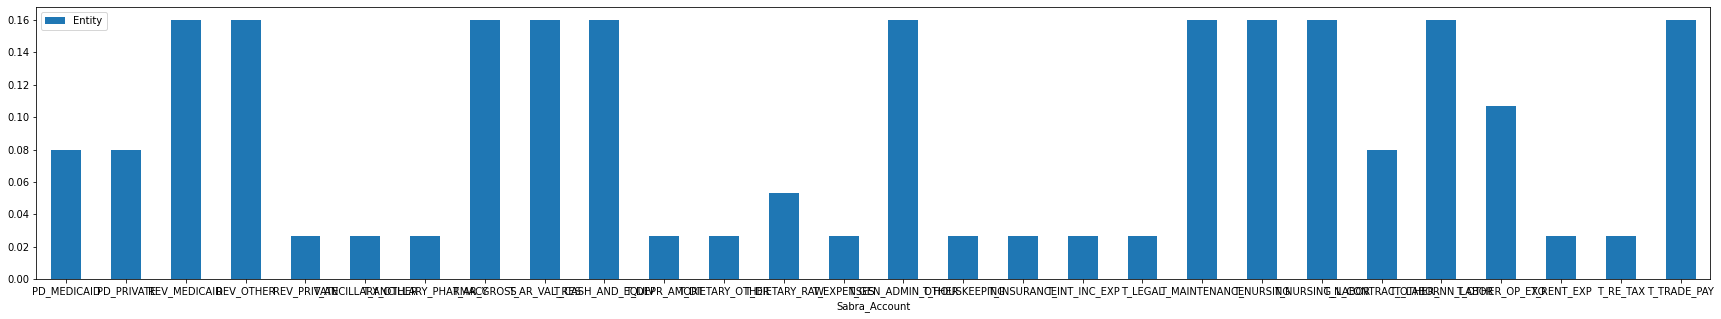

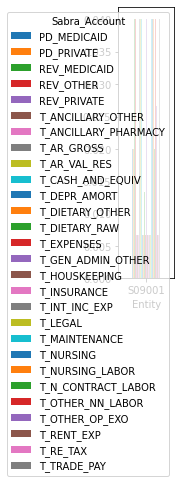

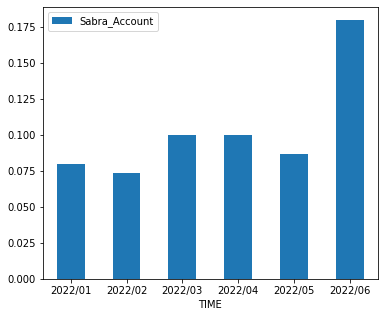

In [18]:
#def main(template_path_filename,finical_path_filename):
if True:
    format_table=pd.read_excel(template_path_filename,sheet_name='Format')
    entity_mapping=pd.read_excel(template_path_filename,sheet_name=sheet_name_entity_mapping)
    TENANT_ID=format_table["Tenant_ID"][0]
    Total_tenant_financial=pd.DataFrame()
    TENANT_ID=format_table["Tenant_ID"][0]
    mapping=Read_Account_Mapping(template_path_filename)
    if format_table["Accounts_in_multiple_sheets"][0]=="N" and format_table["Entity_in_multiple_sheets"][0]=="Y":
        #All accounts are in one sheet
        
        # how about if entity is sold? it is in entity but not in finicial anymore
        for entity_i in range(len(entity_mapping['Entity'])):
            sheet_name=str(entity_mapping.loc[entity_i,"Sheet_Name"])
            print("Start checking sheet：",sheet_name)
            if sheet_name==sheet_name and sheet_name in finicial_sheet_list:
                financial,mapping=Sheet_process(finical_path_filename,sheet_name,mapping)
                financial,financial_with_detail_PLaccounts=Aggregated_Metrix(financial,mapping,entity_mapping.loc[entity_i,"Entity"])
                #print(entity,sheet_name,financial)
                Total_tenant_financial=pd.concat([Total_tenant_financial, financial], ignore_index=False, sort=False)
            
            elif (sheet_name!=sheet_name or sheet_name not in finicial_sheet_list) and entity_i!=len(entity_mapping['Entity'])-1:
                continue
            
            if entity_i==len(entity_mapping['Entity'])-1:
                start_date=min(Total_tenant_financial.columns)+"00"
                end_date=max(Total_tenant_financial.columns)+"00"
                BPC_pull=pull_metrix_from_Sql(TENANT_ID,start_date,end_date) 
                # if found new entities in BPC which is not in template,
                # ask for mapping and update entity_mapping, re-do sheet process for new entities.
                entity_mapping=Map_New_Entity(BPC_pull,entity_mapping)
    
    elif format_table["Accounts_in_multiple_sheets"][0]=="Y" and format_table["Entity_in_multiple_sheets"][0]=="N":
        #All accounts are in one sheet

        for sheet_name in Sheet_name_list:
            print("Sheet_name",sheet_name)
            financial,mapping=Sheet_process(finical_path_filename,format_table,Sheet_name,mapping)
            if financial is False or financial is None:
                        continue
            financial,financial_with_detail_PLaccounts=Aggregated_Metrix(financial,mapping,entity_mapping.loc[entity_i,"Entity"])
            Total_tenant_financial=pd.concat([Total_tenant_financial, financial], ignore_index=False, sort=False)
            print("Total_tenant_financial----------",Total_tenant_financial)

    
 
    diff_BPC_Financial=compare_financial_with_BPC(BPC_pull,Total_tenant_financial,entity_mapping,mapping)
        
    if diff_BPC_Financial.shape[0]==0:
        
        print("100% matches")
    else:
        Print_diff(diff_BPC_Financial,financial_with_detail_PLaccounts)
        

In [21]:
Total_tenant_financial['202205']

S09001  NURSING LABOR               264666.86
        OTHER NON-NURSING LABOR     346780.91
        PD_MEDICAID                   5941.00
        PD_PRIVATE                      62.00
        REV_MEDICAID                293671.39
        REV_OTHER                  1140762.58
        REV_PRIVATE                  14396.40
        T_ANCILLARY_OTHER             1125.05
        T_ANCILLARY_PHARMACY             0.00
        T_BAD_DEBT                       0.00
        T_DEPR_AMORT                 10094.92
        T_DIETARY_OTHER              44937.24
        T_DIETARY_RAW                57367.21
        T_EXPENSES                   39879.31
        T_GEN_ADMIN_OTHER           411875.23
        T_HOUSKEEPING                44283.90
        T_INSURANCE                  13851.00
        T_INT_INC_EXP                 3177.54
        T_LEGAL                       1776.50
        T_MAINTENANCE                33954.16
        T_MARKETING                      0.00
        T_NURSING                 

# 

In [ ]:
if census_financial_seperated==0:
    template_filename=lastest_template
    financial_filename=lastest_financial
    template_path_filename=template_path+template_filename
    finical_path_filename=financial_path+financial_filename
    diff_BPC_Financial=main(template_path_filename,finical_path_filename)
elif census_financial_seperated==1:
    for template_filename in [lastest_template,lastest_template2]:
        template_path_filename=template_path+template_filename
        format_table=pd.read_excel(template_path_filename,sheet_name='Format')
        diff_BPC_Financial=pd.DataFrame()

        finical_path_filename1=financial_path+lastest_financial
        wb1 = openpyxl.load_workbook(finical_path_filename1)
        finical_path_filename2=financial_path+lastest_financial2
        wb2 = openpyxl.load_workbook(finical_path_filename2)
        
        if all([x in wb1.sheetnames for x in format_table["Sheet_name"] if x==x]):
            temp_diff=main(template_path_filename,finical_path_filename1)
            #print(temp_diff)
            diff_BPC_Financial=pd.concat([diff_BPC_Financial,temp_diff],ignore_index=False, sort=False)
            #print(temp_diff)
        elif all([x in wb2.sheetnames for x in format_table["Sheet_name"] if x==x]):
            temp_diff=main(template_path_filename,finical_path_filename2)
            print(temp_diff)
            diff_BPC_Financial=pd.concat([diff_BPC_Financial,temp_diff],ignore_index=False, sort=False)
            print(diff_BPC_Financial)
            
        elif any([x in wb1.sheetnames for x in format_table["Sheet_name"] if x==x]):
            missing_sheet=list(compress(format_table["Sheet_name"], \
                        [x not in wb1.sheetnames for x in format_table["Sheet_name"]]))
            print("Missing sheets in "+Financial_file+": "+", ".join(missing_sheet))

                      
        elif any([x in wb2.sheetnames for x in format_table["Sheet_name"] if x==x]):
            missing_sheet=list(compress(format_table["Sheet_name"], [x not in wb2.sheetnames for x in format_table["Sheet_name"]]))
            print("Missing sheets in "+Financial_file1+": "+", ".join(missing_sheet))
        else:
            print(Financial_file+" or "+Financial_file2+" are supposed to include Sheets: "+", ".join(format_table["Sheet_name"])+", but none of them exists in the two files.")
            
            
print(diff_BPC_Financial)

In [ ]:
if len(date_header[0])==1 and date_header[0]==0:
        return False,mapping
    
    financial.columns=date_header[0]
    
    #tenant_account is index of finicial, only keep rows with accounts and columns with valid month
    #financial=financial.loc[mapping["Tenant_account"],financial.columns!='0']  
    
    financial=financial.set_index(financial.iloc[:,tenantAccount_col_no].values)
    #remove row above date row, remove column without date col name
    financial=financial.iloc[date_header[1]+1:,financial.columns!='0']
    financial.index=map(lambda x:str(x).lower().strip(),financial.index)
    financial.index.name='Tenant_account'
    
    # add code to identify new /lost account
    #list(filter(lambda x:x if x not in list(mapping["Tenant_account"][0:4]) else "",financial.index))
    
    #if there are duplicated accounts in finicial, only keep the last one
    financial=financial[~financial.index.duplicated(keep='last')]
   
    # remove zero/blank column
    financial=financial.loc[:,financial.apply(pd.Series.nunique) != 1]
    #remove rows with nan tenant account
    financial=financial.loc[list(filter(lambda x:x!='nan',financial.index))]
    mapping=Map_New_Account(financial,mapping,sheet_name)

In [ ]:
RptCurrency	USD
CATEGORY	ACTUAL
DATASRC	D_INPUT
ENTITY	
FACILITY_TYPE	FT_SNF
FLOW	F_NONE
GEOGRAPHY	ST_NH
INVEST_TYPE	INV_EQUITY
MEASURES	PERIODIC
TIME	2023.Apr

In [ ]:
def colnum_string(n):
    string = ""
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        string = chr(65 + remainder) + string
    return string 

def EPM_formula(data):
    data=data.reset_index(drop=True)
    # EPMSAVEDATA formula
    col_num=data.shape[1]
    row_num=data.shape[0]
    for c in range(11,col_num):
        column_name=data.columns[c]

        col_letter=colnum_string(c+1)
        EPM_data=data
        for r in range(2,row_num+2):
            r_str=str(r)
            formula="=@EPMSaveData("+col_letter+r_str+","+'"finance"'+",A"+r_str+",B"+r_str+",C"+r_str+",D"+r_str+",E"+r_str+",F"+\
            r_str+",G"+r_str+",H"+r_str+",I"+r_str+",J"+r_str+",K"+r_str+","+col_letter+"1"+")"        
            EPM_data.loc[row_num+r+2,column_name]=formula  
     
    return EPM_data